####  This file explores our sentiment analysis using a Bag of Words approach using a NN to build our model
#### Results: Increase in the Amazon dataset but overall similar to our baseline of BOW w/ Logistic Regression

In [28]:
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [21]:
filepath_dict = {'yelp': './data/yelp_labelled.txt',
                'amazon' : './data/amazon_cells_labelled.txt',
                'imdb' : './data/imdb_labelled.txt'}
df_list = []
for source,path in filepath_dict.items():
    df = pd.read_csv(path, names = ['sentence', 'label'], sep= '\t')
    df['source'] = source
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[0])

sentence    Wow... Loved this place.
label                              1
source                          yelp
Name: 0, dtype: object


In [22]:
df_yelp = df[df['source'] == 'yelp']
sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train,sentences_test,y_train,y_test = train_test_split(sentences,y,test_size=0.25,random_state=1000)

print('Training set: {} '.format(len(sentences_train)))
print('Testing set: {} '.format(len(sentences_test)))

Training set: 750 
Testing set: 250 


In [23]:
# we will create our vocabulary using only the training set
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

#then we create our feature vectors for every sentence. NOTE: scikit takes care of lots of preprocessing for us by
#tokenizing sentences (removing punctuation, special characters....)
#this is one of our HYPER PERAMETERS, we can change how we tokenize
X_train = vectorizer.transform(sentences_train)
X_test =  vectorizer.transform(sentences_test)

#for these reviews the vocabulary is 1714 words which will mean that every feature vector is that long as well (not hot)
X_train.shape

(750, 1714)

In [24]:
# now we can see how our regular vectors do with a NN rather than a logistic regression model
input_dim = X_train.shape[1]

# here we create a model that maps 1714 dimensions to 10, then to 1 which will use sigmoid to output a 1 or 0

model = Sequential()
model.add(layers.Dense(10,input_dim= input_dim, activation = 'relu'))
model.add(layers.Dense(1,activation= 'sigmoid'))

In [25]:
model.compile(loss = 'binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                17150     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 17,161
Trainable params: 17,161
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model.fit(X_train,y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test,y_test),
                    batch_size=10)

Train on 750 samples, validate on 250 samples
Epoch 1/20
750/750 [==============================] - 0s 262us/step - loss: 4.6593e-05 - acc: 1.0000 - val_loss: 0.9556 - val_acc: 0.7920
Epoch 2/20
750/750 [==============================] - 0s 257us/step - loss: 4.4635e-05 - acc: 1.0000 - val_loss: 0.9595 - val_acc: 0.7920
Epoch 3/20
750/750 [==============================] - 0s 247us/step - loss: 4.2807e-05 - acc: 1.0000 - val_loss: 0.9637 - val_acc: 0.7920
Epoch 4/20
750/750 [==============================] - 0s 337us/step - loss: 4.1209e-05 - acc: 1.0000 - val_loss: 0.9679 - val_acc: 0.7920
Epoch 5/20
750/750 [==============================] - 0s 279us/step - loss: 3.9451e-05 - acc: 1.0000 - val_loss: 0.9727 - val_acc: 0.7920
Epoch 6/20
750/750 [==============================] - 0s 440us/step - loss: 3.8028e-05 - acc: 1.0000 - val_loss: 0.9764 - val_acc: 0.7920
Epoch 7/20
750/750 [==============================] - 0s 498us/step - loss: 3.6435e-05 - acc: 1.0000 - val_loss: 0.9803 - val_

In [27]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7880


In [29]:
# NOTE: the model is very clearly overfit. We only had 750 training data points. and used 150 epochs with 10
# data samples
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

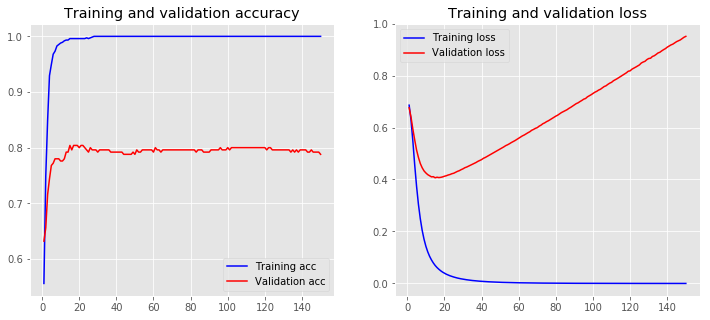

In [30]:
plot_history(history)

In [ ]:
# for learning: typically we have some validation set that we use to pick our best model
# then once found we use that against our test set for papers and such
# as you can see the best accuracy is around 20 epochs. So I have retrained the model using 20 epochs
# now we can test our new model against the Amazon and IMDB data sets

In [34]:
for source in df['source'].unique():
    
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values
    X =  vectorizer.transform(sentences)
    
    loss, accuracy = model.evaluate(X, y, verbose=False)
    
    print('Accuracy for ',source,' data: ', accuracy)

Accuracy for  yelp  data:  0.946
Accuracy for  amazon  data:  0.731
Accuracy for  imdb  data:  0.7165775404256933


In [ ]:
# as you can see our IMDB accuracy increased by about 5%. Otherwise our results are very similar.